


#  Convolutions and separable convolutions

Kernel convolution

https://en.wikipedia.org/wiki/Kernel_(image_processing)

$$
R(x,y) = I(x,y) * w = \sum_{s=-a}^a \sum_{t=-b}^b w(s,t) I(x-s,y-t)
$$

where $I(x,y)$ is an image, $R(x,y)$ is the result of applying a convolution by $w$ to $I$.

Notice $$w \in \mathbb{R}^{a \times b}$$

Edge detection kernel example:

\begin{bmatrix}
\ \ 1 & 0 & -1 \\
\ \ 0 & 0 & \ \ 0 \\
-1 & 0 & \ \ 1 \\
\end{bmatrix}


In [1]:
import skimage

import numpy as np # useful for manipulating matrices
from skimage import io # useful for image loading and saving
from matplotlib import pyplot as plt # useful for plotting images on iPython or Jupyter Notebooks
import scipy
from skimage import filters # for edge detection

In [2]:
%matplotlib inline

#### Using  `skimage.exposure.histogram` in a real image

In [3]:
im=io.imread('../images/delicious.jpeg')

im_r = skimage.img_as_float(im[:,:,0])
hst_r, bins_r = skimage.exposure.histogram(im_r, nbins=8) 

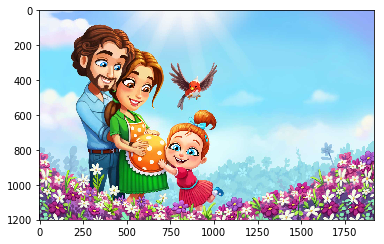

In [4]:
plt.imshow(im)

In [5]:
im.shape

(1202, 1920, 3)

In [6]:
#take chanel 0
img_r = im[:,:,0]
img_b = im[:,:,1]
img_g = im[:,:,2]

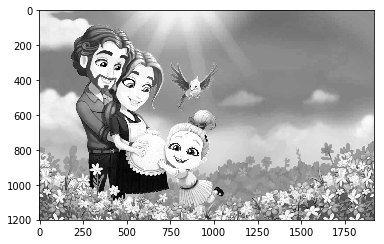

In [7]:
plt.imshow(img_r, cmap="gray")

We want to code a convolution function so that we get a similar output as this:

CPU times: user 1.48 s, sys: 29.2 ms, total: 1.51 s
Wall time: 890 ms


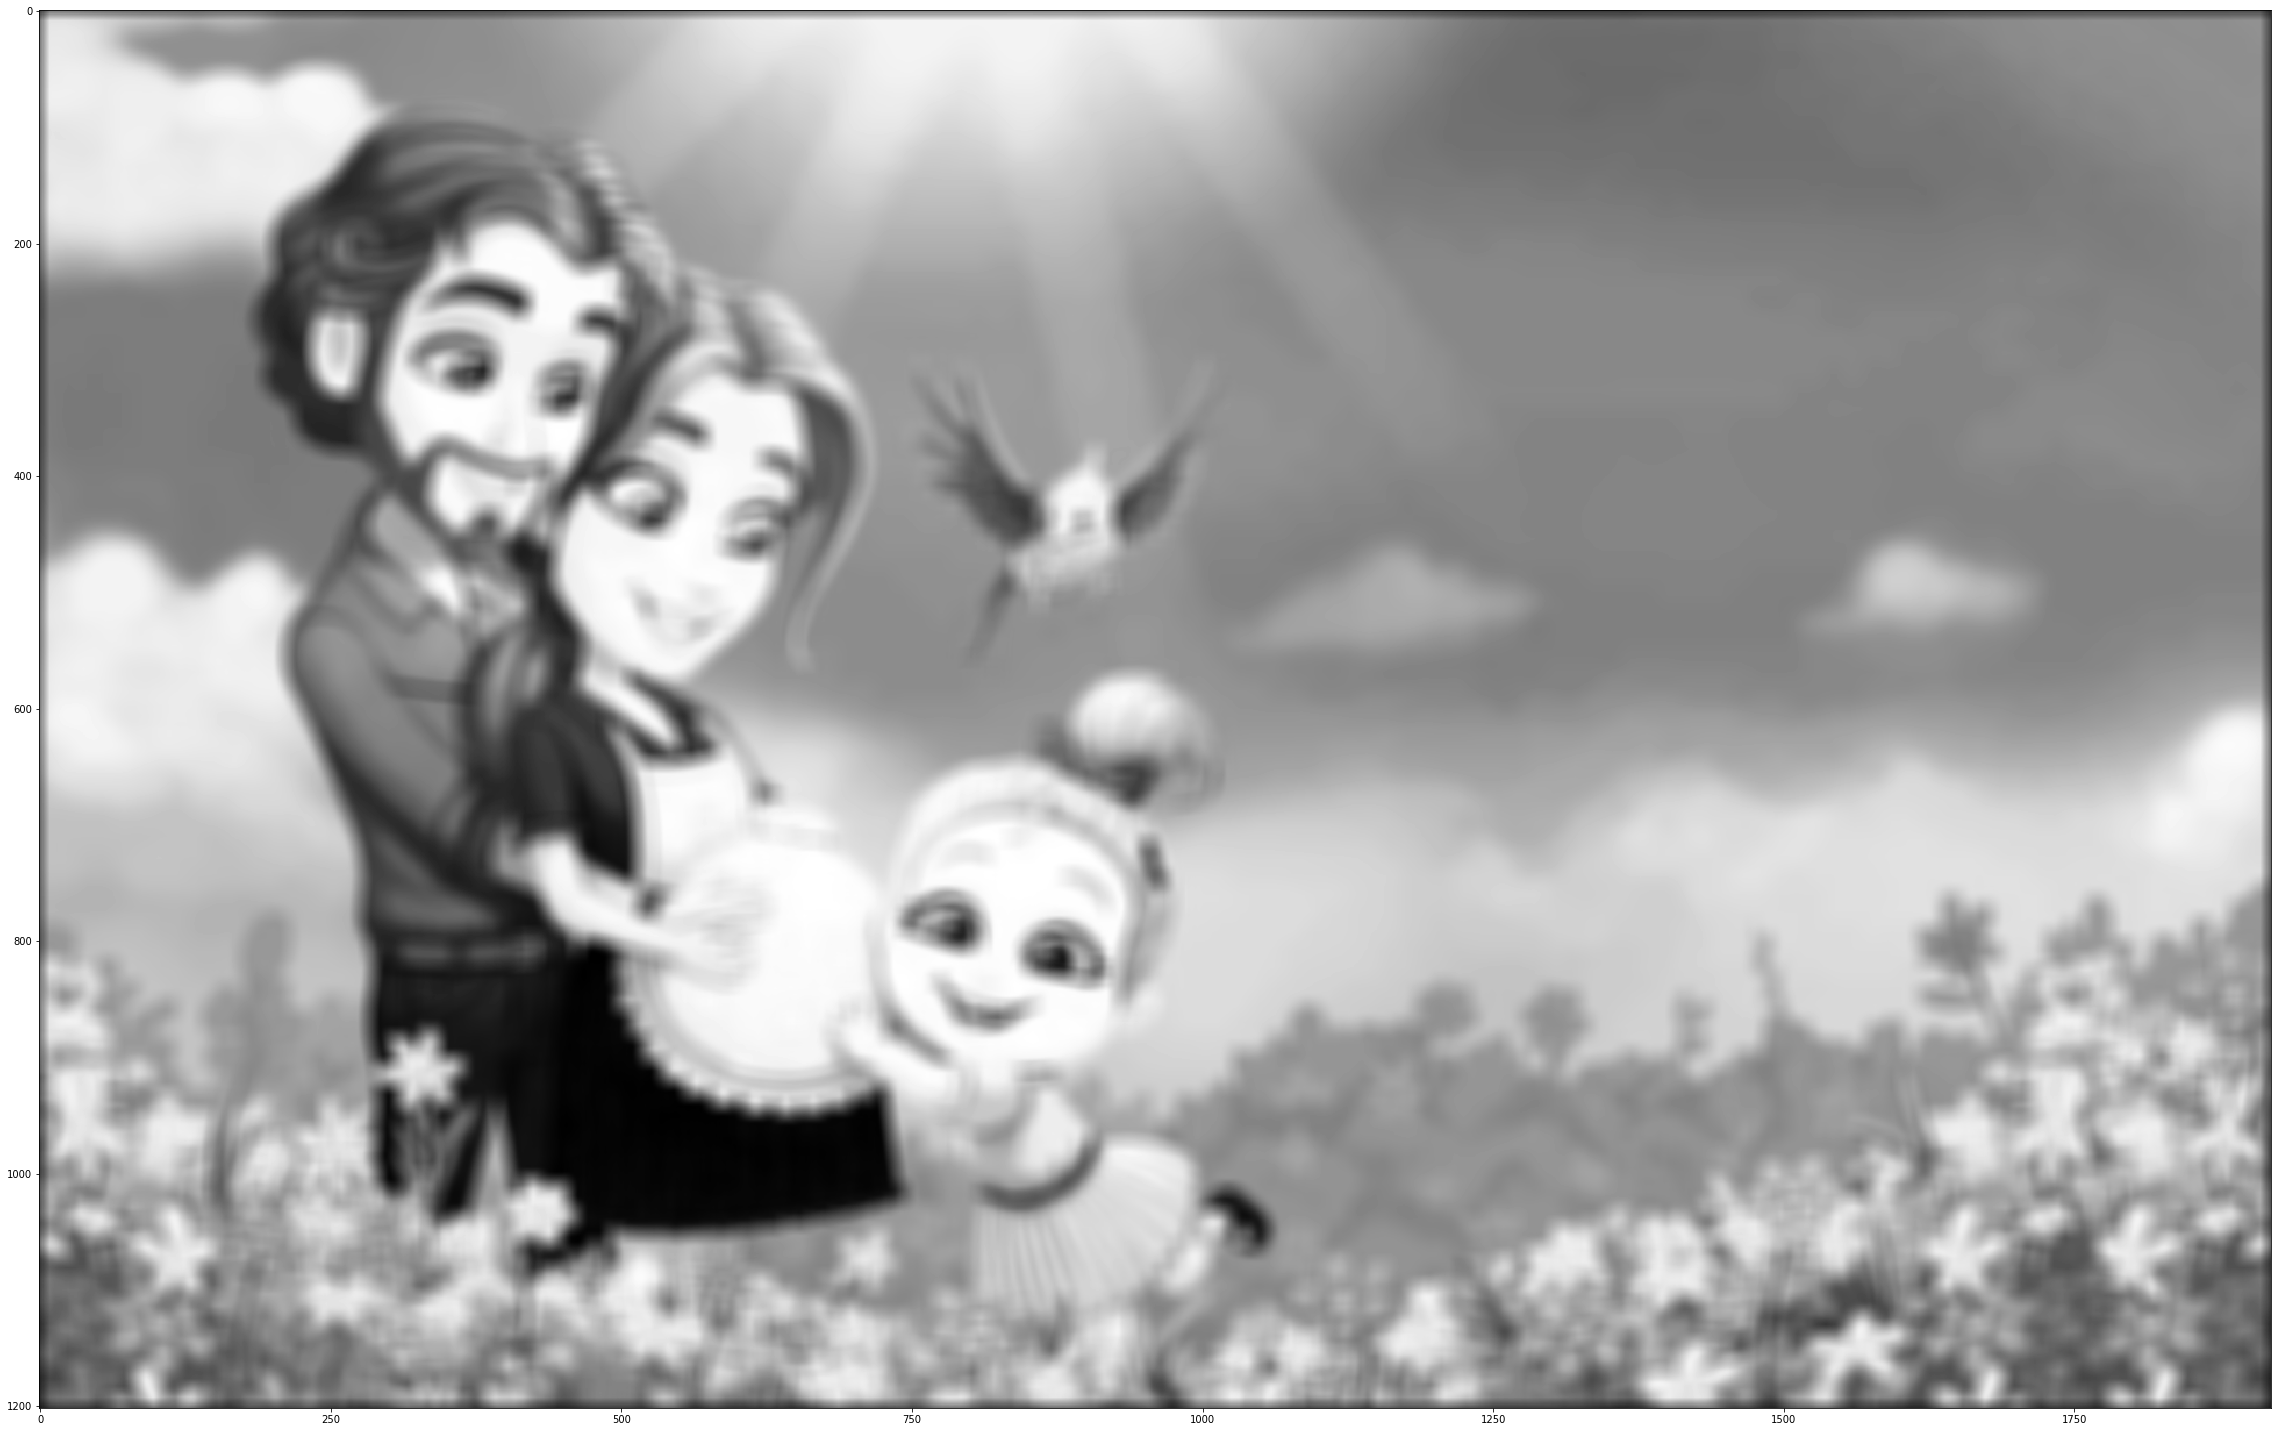

In [8]:
%%time
im=io.imread('../images/delicious.jpeg')
im_r = skimage.img_as_float(im[:,:,0])
mask = np.ones((19,19))
convolved_image = scipy.ndimage.convolve(im_r, mask, mode="constant", cval=0)
plt.figure(figsize = (40,40))
plt.imshow(convolved_image, cmap="gray")

## Making a convolution from scatch

https://machinelearninguru.com/computer_vision/basics/convolution/image_convolution_1.html


### Convolution by squared kernel 

First let us assume we are using squared kernel matrices to simplify the ideas. It is straightforward to write a general case once the understand this.

Let us consider the following matrix representing an image of dimension
(4,7)

```
    x x x x x x x
    x x x x x x x
    x x x x x x x
    x x x x x x x
```

Let us consider a kernel of size 3x3
```
    k k k
    k k k
    k k k
```

We can make a diagram of the positions where we can place the kernel and have a defined convolution

The first position is centered at (1,1)

```
    k k k x x x x
    k k k x x x x
    k k k x x x x
    x x x x x x x
```
The second position is centered at (1,2)

```
    x k k k x x x
    x k k k x x x
    x k k k x x x
    x x x x x x x
```
and so on..


The following diagram shows with `V`  the valid positions at which we can center `K` and have a well defined `K*image_path(x,y)`
```
    x x x x x x x
    x V V V V V x
    x V V V V V x
    x x x x x x x
```


The following diagram shows with `V`  the valid positions at which we can center `K` and have a well defined `K*image_path(x,y)`.

Notice that if we want to place a kernel at position `(0,0)` then we face the following case:
```
  k k k
  k @ k x x x x x
  k k k V V V V x
    x V V V V V x
    x x x x x x x
```

We we need an extra row and extra column.

But wait, what if we had a 4x4 Kernel matrix? 

First notice that if the kernel has an even number of rows and columns then there is no "center"

```
Here we have one center

k k k
k @ k
k k k

Notice here we have 4 centers:

k k k k 
k @ @ k 
k @ @ k
k k k k

Here we have one

k k k k k 
k k k k k 
k k @ k k 
k k k k k 
k k k k k 

Here we have 4

k k k k k k
k k k k k k
k k @ @ k k
k k @ @ k k
k k k k k k
k k k k k k
```

When there are several possible centers to choose we can simply make an arbitrary decision (like the top left center), and be consistent across our code.

What is theferore a valid "center position"?
In this case we can use simply the top left center position of the 4x4 kernel matrix.
In this case we need to add a row and column at the top but at the bottom we will need to add two rows and two columns
```
  k k k k
  k @ k k x x x x
  k k k k V V V x
  k x k k V V V x
    x x x x x x x
```

What about a 5x5 Kernel matrix? Then we would need two columns and two rows more!

```
k k k k k 
k k k k k
k k @ k k x x x x
k k k k k V V V x
k k x k k V V V x
    x x x x x x x
```

Filter of size 6x6

```
k k k k k k
k k k k k k 
k k @ k k k x x x
k k k k k k V V x
k k k k k k V V x
k k k k k k x x x
```


Do you notice a pattern?

```
Filter size     Number of appended rows and cols
3 x 3                      1
4 x 4                      2
5 x 5                      2
6 x 6                      3
```

Do you notice a pattern?

```
Filter size     Number of appended rows and cols
3 x 3                      int(3/2)
4 x 4                      int(4/2)
5 x 5                      int(5/2)
6 x 6                      int(6/2)
```

In [9]:
print(int(3/2))
print(int(4/2))
print(int(5/2))
print(int(6/2))

1
2
2
3


In the case of the 4x4 filter we add 2 (int(4/2)) rows and cols to the original image in a new image we might call im_padded. Then we apply the convolution at all positions of the original image.



Diagram appending zeros. After appending zeros we have all positions
in our original array valid as centers to the kernel.

```
                ->  0 0 0 0 0 0 0 0 0 0 0 
                ->  0 0 0 0 0 0 0 0 0 0 0 
 x x x x x x x  ->  0 0 x x x x x x x 0 0 
 x V V V V V x  ->  0 0 x V V V V V x 0 0 
 x V V V V V x  ->  0 0 x V V V V V x 0 0 
 x x x x x x x  ->  0 0 x x x x x x x 0 0 
                ->  0 0 0 0 0 0 0 0 0 0 0 
                ->  0 0 0 0 0 0 0 0 0 0 0 
```                                   

The right bottom position of the kernel is found here:

```
                ->  0 0 0 0 0 0 0 0 0 0 0 
                ->  0 0 0 0 0 0 0 0 0 0 0 
 x x x x x x x  ->  0 0 x x x x x x x 0 0 
 x V V V V V x  ->  0 0 x V V V V V x 0 0 
 x V V V V V x  ->  0 0 x V V V V k k k k 
 x x x x x x x  ->  0 0 x x x x x k @ k k 
                ->  0 0 0 0 0 0 0 k k k k 
                ->  0 0 0 0 0 0 0 k k k k 

```      

### Valid convolution (without padding)

If we convolve $n \times n$ matrix by an $f \times f $ filter we get a
$ (n-f+1) \times  (n-f+1)$ matrix.

- A 6x6 image convolved by 3x3 filter returns a 4x4 output.

### Same convolution (with padding)


If we pad an image by $p=\frac{f-1}{2}$ zeros on all rows and columns then:

- A 6x6 image convolved by 3x3 filter returns a 6x6 output.



In [10]:
def convolve_by_squaredK(image, K):
    assert image.ndim==2, "image has {} it should be 2".format(image.ndim)
    assert K.ndim==2, "K has {} it should be 2".format(image.ndim)
    assert K.shape[0]==K.shape[1],"K.shape={} but should be a squared matrix".format(K.shape)
    
    result = np.zeros(image.shape)
    n_row, n_col = image.shape
    
    # append zeros to result now
    f = K.shape[0]
    p = int(f/2)
    image_padded = np.zeros((n_row+2*p, n_col+2*p))
    image_padded[p:n_row+p, p:n_col+p] = image

    # iterate over positions 
    for r in range(n_row):
        for c in range(n_col):
            result[r,c] = np.sum(image_padded[r:r+f,c:c+f]*K)
            
    return result

In [11]:
image = im_r[0:10,0:12]
n_row, n_col = image.shape

In [12]:
image.shape, (n_row,n_col)

((10, 12), (10, 12))

In [13]:
image[0:3,0:3]

array([[0.84705882, 0.8627451 , 0.88235294],
       [0.84705882, 0.86666667, 0.88235294],
       [0.85098039, 0.86666667, 0.88235294]])

In [14]:
f = 3
K = np.ones((f,f))

In [15]:
n_row, n_col = image.shape
p = int(K.shape[0]/2)
f = K.shape[0]
p,f


(1, 3)

In [16]:
k1 = np.zeros((3,1))
k1

array([[0.],
       [0.],
       [0.]])

In [17]:
image_padded = np.zeros((n_row+2*p, n_col+2*p))
image_padded[p:n_row+p,p:n_col+p] = image
image_padded.shape

(12, 14)

In [18]:
# at result[0,0] I have to write np.sum(image_padded[0:3,0:3]*K)
r,c = 0,0
image_padded[r:r+3,c:c+3]

array([[0.        , 0.        , 0.        ],
       [0.        , 0.84705882, 0.8627451 ],
       [0.        , 0.84705882, 0.86666667]])

In [19]:
# at result[0,1] I have to write np.sum(image_padded[0:3,1:3]*K)
r,c = 0,1
image_padded[r:r+3,c:c+3]

array([[0.        , 0.        , 0.        ],
       [0.84705882, 0.8627451 , 0.88235294],
       [0.84705882, 0.86666667, 0.88235294]])

In [20]:
r,c = n_row-1,n_col-1
image_padded[r:r+3,c:c+3]

array([[0.90196078, 0.90196078, 0.        ],
       [0.90196078, 0.90196078, 0.        ],
       [0.        , 0.        , 0.        ]])

In [21]:
image.shape

(10, 12)

In [22]:
K = np.ones((3,3))
convolve_by_squaredK(image, K).shape

(10, 12)

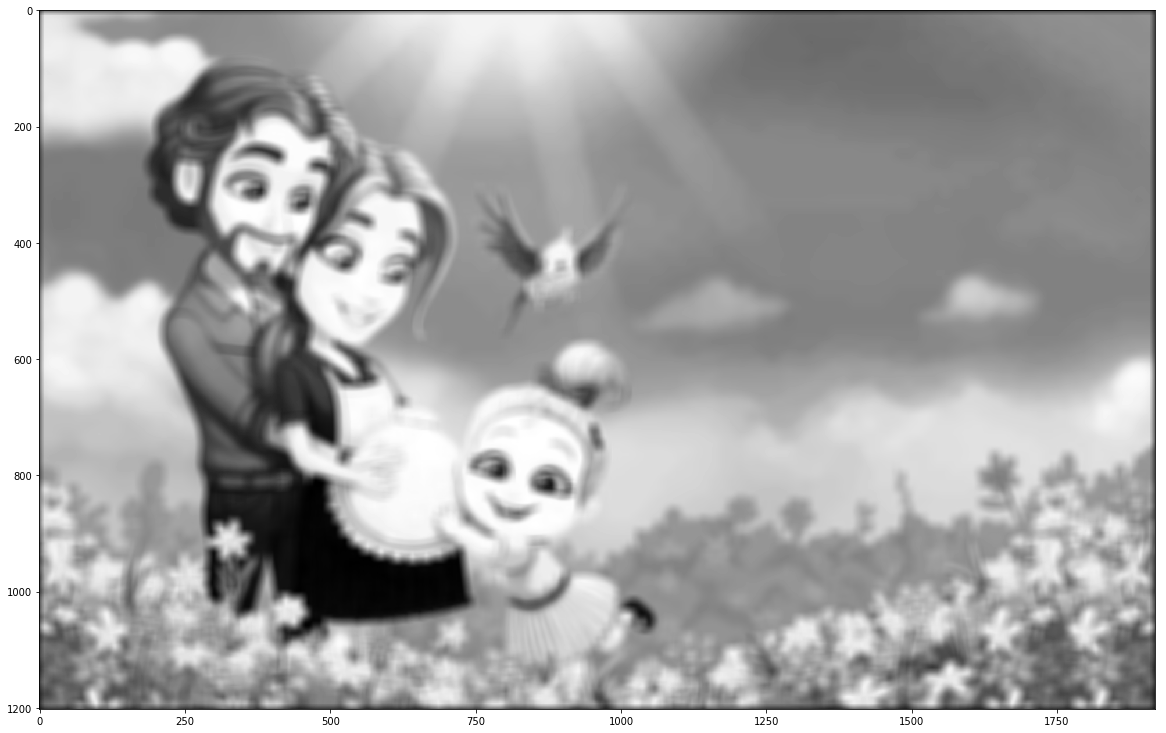

In [28]:
#%%time
im=io.imread('../images/delicious.jpeg')
im_r = skimage.img_as_float(im[:,:,0])
K = np.ones((19,19))
K = K/np.sum(K)

convolved_image_custom = convolve_by_squaredK(im_r, K) 
plt.figure(figsize = (20,20))
plt.imshow(convolved_image_custom, cmap="gray")

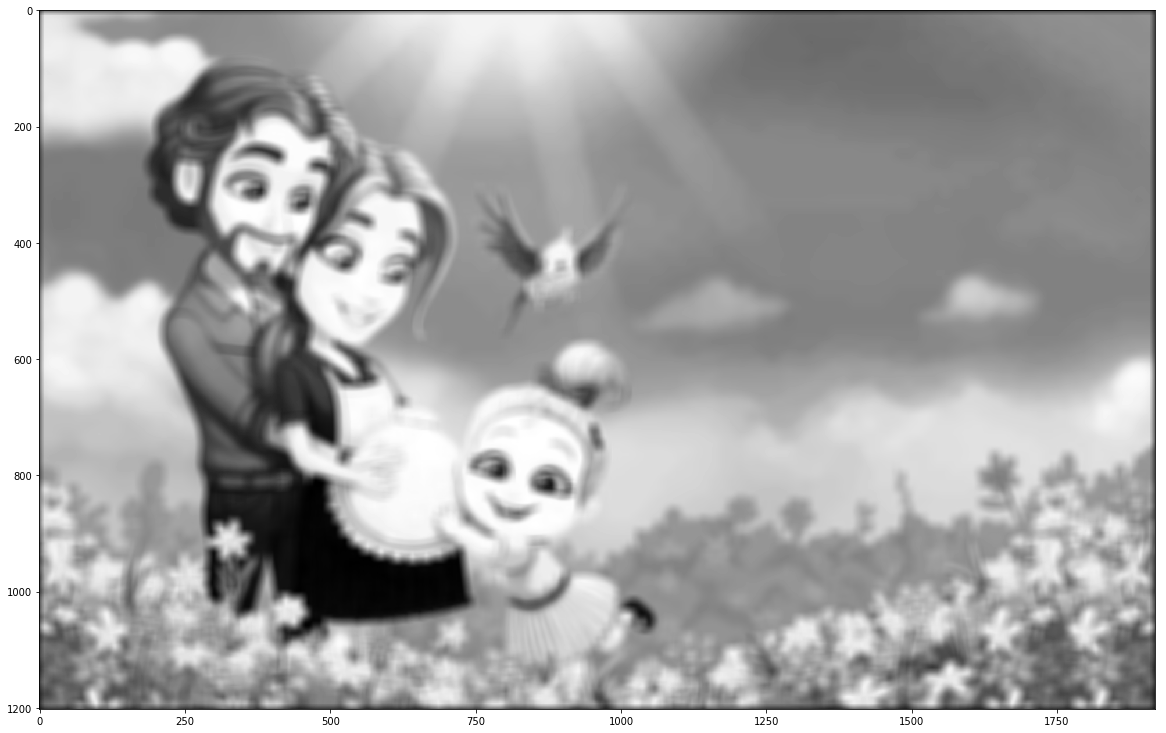

In [29]:
#%%time
im=io.imread('../images/delicious.jpeg')
im_r = skimage.img_as_float(im[:,:,0])
K = np.ones((19,19))
K = K/np.sum(K)

convolved_image = scipy.ndimage.convolve(im_r, K, mode="constant", cval=0)
plt.figure(figsize = (20,20))
plt.imshow(convolved_image, cmap="gray")

In [30]:
convolved_image_custom[0][0:3]

array([0.24463636, 0.2692738 , 0.29391125])

In [31]:
convolved_image[0][0:3]

array([0.24463636, 0.2692738 , 0.29391125])

In [32]:
np.mean(np.abs(convolved_image - convolved_image_custom) < 0.00001)

1.0

##  Speeding up the convolution code (cython)

In [33]:
%load_ext Cython

In [34]:
%%cython

cimport numpy as np
import numpy as np

# We now need to fix a datatype for our arrays. I've used the variable
# DTYPE for this, which is assigned to the usual NumPy runtime
# type info object.
from cython.parallel import prange
cimport cython

@cython.boundscheck(False)
@cython.wraparound(False)
#@cython.cmultiplication(True)
def cy_convolve_by_squaredK(double[:, :] image, double[:,:] K):
    assert image.ndim==2, "image has {} it should be 2".format(image.ndim)
    assert K.ndim==2, "K has {} it should be 2".format(image.ndim)
    assert K.shape[0]==K.shape[1],"K.shape={} but should be a squared matrix".format(K.shape)
    
    cdef int n_row = image.shape[0]
    cdef int n_col = image.shape[1]

    # append zeros to result now
    cdef int p = int(K.shape[0]/2)
    cdef int f = K.shape[0]
    
    cdef double[:,:] result = np.zeros([n_row, n_col], dtype=np.float64)
    #cdef np.ndarray[np.double, ndim=2] result = np.zeros([n_row, n_col], dtype=np.float64)
    
    cdef double[:,:] image_padded = np.zeros([n_row+2*p, n_col+2*p], dtype=np.float64)
    #cdef np.ndarray[np.double, ndim=2] result = np.zeros([n_row+2*p, n_col+2*p], dtype=np.float64)

    # write the image inside the padded image
    image_padded[p:n_row+p, p:n_col+p] = image
    cdef int c,r,i,j
    cdef double slice_by_K 
    
    # iterate over positions 
    for r in range(n_row):
        for c in range(n_col):
            slice_by_K = 0.0
            for j in range(f):
                for i in range(f):
                    slice_by_K +=image_padded[r+i,c+j]*K[i,j] 
            result[r,c] = slice_by_K

    return np.asarray(result)


In [35]:
%%timeit 
convolved_image_custom_cy = cy_convolve_by_squaredK(im_r, K) 

803 ms ± 19.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


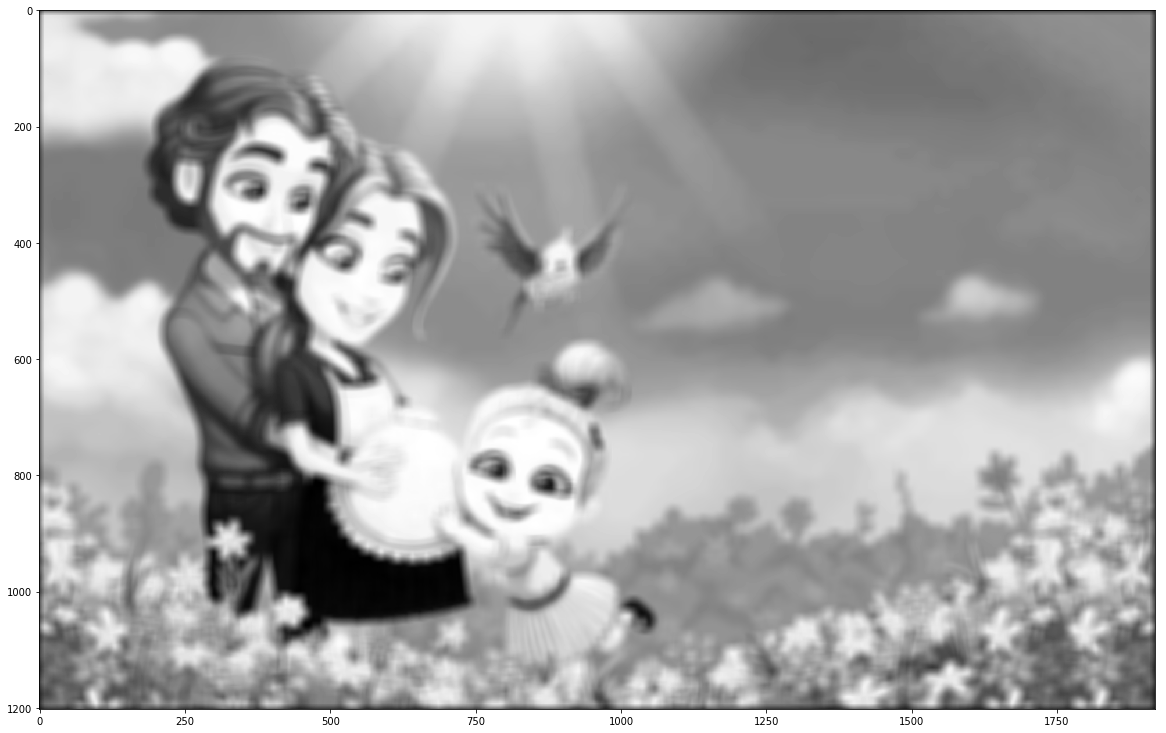

In [38]:
#%%time 
im=io.imread('../images/delicious.jpeg')
im_r = skimage.img_as_float(im[:,:,0])
K = np.ones((19,19))
K = K/np.sum(K)

convolved_image_custom_cy = cy_convolve_by_squaredK(im_r, K) 
plt.figure(figsize = (20,20))
plt.imshow(convolved_image_custom, cmap="gray")

In [39]:
np.mean(np.abs(convolved_image - convolved_image_custom_cy) < 0.00001)

1.0

## Speeding up the convolution code (Separable filters)

### Separable filters

- We say a convolution kernel $K$ is separable by $k_1$ and $k_2$ if and only if $K = k_1 \cdot k_2^T$.

- We say that a convolution kernel $K$  is separable if there are two vectors $k_1$ and $k_2$ such that $K = k_1 \cdot k_2^T$.

Notice that not all Kernels are separable.

- A kernel is seperable when all the rows and columns are **linearly dependent**. In the case of 2D matrices (np arrays with ndim=2) this is equivalent to say that the rank of the matrix is 1.

#### Example of separable kernel

The following $K$ is separable 
$$
K = \left[
\begin{matrix}
0.30& 0.05& 0.15\\
0.18& 0.03& 0.0\\
0.12& 0.02& 0.06\\
\end{matrix}
\right]
$$

why? because 

$$
K = h_1 \cdot h_2^T = 
\left[
\begin{matrix}
0.5\\
0.3\\
0.2\\
\end{matrix}
\right] \cdot \begin{matrix}[0.6& 0.1&0.3]\end{matrix}
= \left[
\begin{matrix}
0.30& 0.05& 0.15\\
0.18& 0.03& 0.0\\
0.12& 0.02& 0.06\\
\end{matrix}
\right]
$$

### Advantage of separable fiters

We can convert an M*N algorithm to an M+N algorithm.

If a kernel is separable we can implement the convolution $I *K$ in two passes. That is $I *K =(I * k_1) * k_2$ 


##### Video explaining separate filters

https://www.youtube.com/watch?v=SiJpkucGa1o



In [40]:
h1 = np.array([[0.5, 0.3, 0.2]]).T
h2 = np.array([[0.6, 0.1, 0.3]]).T

K = h1 * h2.T
K

array([[0.3 , 0.05, 0.15],
       [0.18, 0.03, 0.09],
       [0.12, 0.02, 0.06]])

In [41]:
# Kernel is separable
np.linalg.matrix_rank(K)

1

Another example of separable convolution

In [42]:
import numpy as np
v = np.array([[1, 2, 3]]).T 
h = np.array([[30, 20, 10]])

In [43]:
K = v * h
K

array([[30, 20, 10],
       [60, 40, 20],
       [90, 60, 30]])

In [44]:
np.linalg.matrix_rank(K)

1


### About the mean fiter


Previously we used
```
K = np.ones((19,19))
```
Is it a separable filter?

Yes because ....

```
K = np.ones((19,19))
k1 = np.ones((19,1))
k2 = np.ones((19,1))
np.linalg.norm(K - k1*k2.T)
```


In [45]:
K = np.ones((19,19))
k1 = np.ones((19,1))
k2 = np.ones((19,1))
np.linalg.norm(K - k1*k2.T)

0.0

### Speeding up the code in two passes


```python
        kernel_1d = gaussian_kernel_1d(args.sigma)

        # We need to store the half convolved intermediate image.
        # You could save time by going img -> output-> img and not allocating this array.
        # Bearing in mind if you do this you can't use img for anything else.
        intermediate = np.zeros(img.shape, dtype=np.float32) 
        
        # Convolve in two passes - we must store and use the intermediate image, don't read from the input both times!
        compute.convolve(img, intermediate, kernel_1d)
        compute.convolve(intermediate, output, kernel_1d.transpose())
    
```

In [46]:
def convolve_by_K(image, K):
    assert image.ndim==2, "image has {} it should be 2".format(image.ndim)
    assert K.ndim==2, "K has {} it should be 2".format(image.ndim)
    
    result = np.zeros(image.shape)
    n_row, n_col = image.shape

    # append zeros to result now
    f1 = K.shape[0]
    f2 = K.shape[1]
    p1 = int((f1-1)/2) 
    p2 = int((f2-1)/2) 

    image_padded = np.zeros((n_row+2*p1, n_col+2*p2))
    image_padded[p1:n_row+p1, p2:n_col+p2] = image

    print("image.shape={}, image_padded.shape = {}".format(image.shape, image_padded.shape))
    print("K.shape={}, f1={},f2={},p1={},p2={} ".format(K.shape, f1,f2,p1,p2))
    # iterate over positions 
    for row in range(n_row):
        for col in range(n_col):
            #if image_padded[row:row+f1,col:col+f2].shape == (18,1):
            #    import pdb; pdb.set_trace()
            result[row,col] = np.sum(image_padded[row:row+f1,col:col+f2]*K)
            
    return result

In [47]:
K = np.ones((19,19))
K = K/np.sum(K)

k1 = np.ones((19,1))
k1 = k1/np.sum(k1)

k2 = np.ones((19,1))
k2 = k2/np.sum(k2)

In [48]:
im_r.shape

(1202, 1920)

Now we want to convolve our image `im_r` by our kernel `k1` which has shape (19,1).
Thefore, think about how many zero pad we need at position image(0,0).


Let's do the same argument for a filter (5,1)

```

x x x x x x x x x x x x
x x x x x x x x x x x x
x x x x x x x x x x x x
x x x x x x x x x x x x
x x x x x x x x x x x x
x x x x x x x x x x x x
x x x x x x x x x x x x
```

First row
```
k
k
@ x x x x x x x x x x x
k x x x x x x x x x x x
k x x x x x x x x x x x
x x x x x x x x x x x x
x x x x x x x x x x x x
x x x x x x x x x x x x
x x x x x x x x x x x x

```


Last row
```
x x x x x x x x x x x x
x x x x x x x x x x x x
x x x x x x x x x x x x
x x x x x x x x x x x x
k x x x x x x x x x x x
k x x x x x x x x x x x
@ x x x x x x x x x x x
k
k
```

In [49]:
f1 = k1.shape[0]
f2 = k1.shape[1]
p1 = int(f1/2)
p2 = int(f2/2)
# notice we don't want a zero in the first case
p1,p2 

(9, 0)

In [54]:
#%%time
res_k1 = convolve_by_K(im_r, k1)

image.shape=(1202, 1920), image_padded.shape = (1220, 1920)
K.shape=(19, 1), f1=19,f2=1,p1=9,p2=0 


In [55]:
#%%time
res_k1_scp = scipy.ndimage.convolve(im_r, k1, mode="constant", cval=0)

In [56]:
np.mean(np.abs(res_k1 - res_k1_scp) <0.00001)

1.0

In [57]:
res_k1.shape, im_r.shape

((1202, 1920), (1202, 1920))

In [58]:
#%%time
res_k1k2 = convolve_by_K(res_k1,k2.T)

image.shape=(1202, 1920), image_padded.shape = (1202, 1938)
K.shape=(1, 19), f1=1,f2=19,p1=0,p2=9 


Now we want to see that making two convolution passes with the different vertical and horizontal filters

```
res_k1 = convolve_by_K(im_r, k1)
res_k1k2 = convolve_by_K(res_k1,k2.T)
```

Is equivalent to making a single convolution with the whole matrix kernel

```
res_K = scipy.ndimage.convolve(im_r, K, mode="constant", cval=0)
```



In [59]:
res_K = scipy.ndimage.convolve(im_r, K, mode="constant", cval=0)

In [60]:
np.mean(np.abs(res_k1k2 - res_K)<0.00001)

1.0

Plotting the results

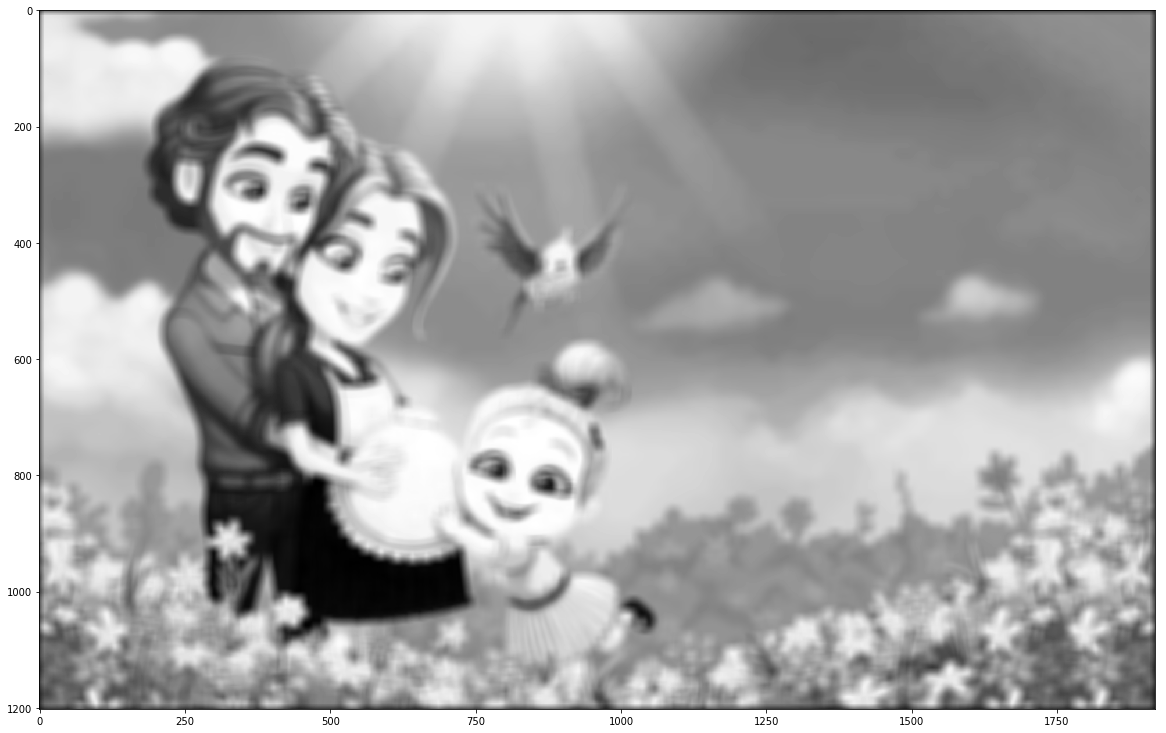

In [61]:
plt.figure(figsize=(20,20))
plt.imshow(res_k1k2, cmap="gray")

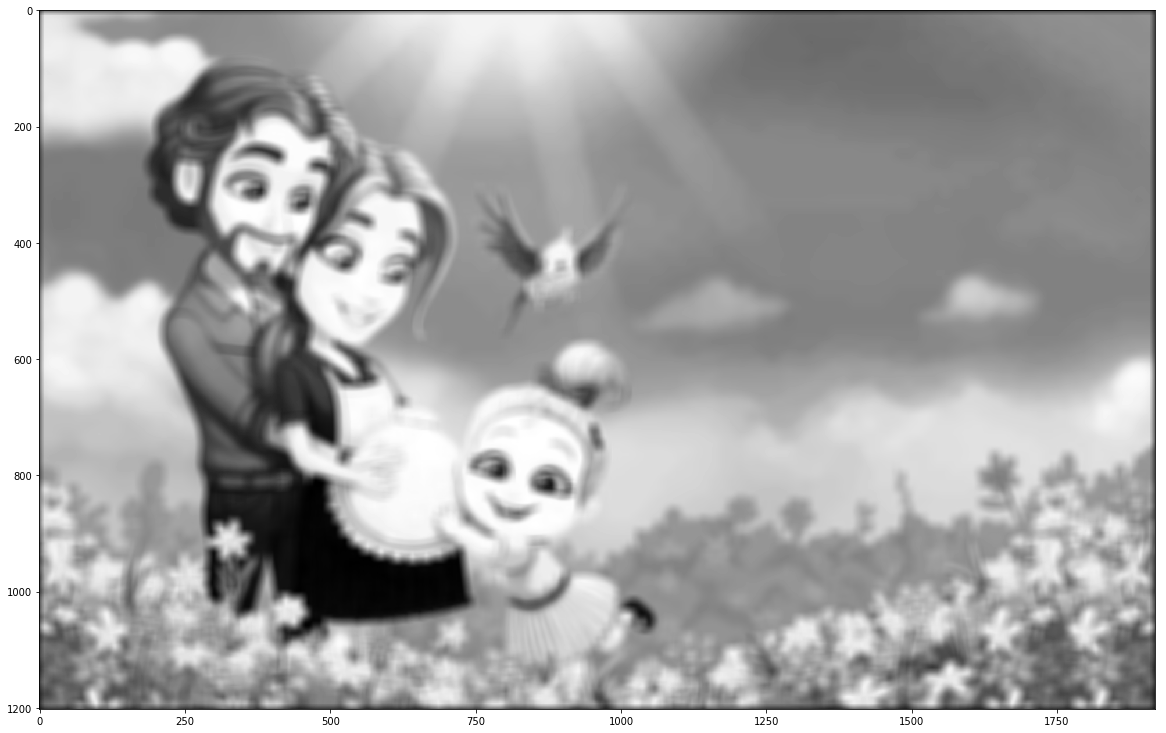

In [62]:
plt.figure(figsize=(20,20))
plt.imshow(res_K, cmap="gray")

## cython version for non squared kernels 

In [63]:
def convolve_by_K(image, K):
    assert image.ndim==2, "image has {} it should be 2".format(image.ndim)
    assert K.ndim==2, "K has {} it should be 2".format(image.ndim)
    
    result = np.zeros(image.shape)
    n_row, n_col = image.shape

    # append zeros to result now
    f1 = K.shape[0]
    f2 = K.shape[1]
    p1 = int((f1-1)/2) 
    p2 = int((f2-1)/2) 

    image_padded = np.zeros((n_row+2*p1, n_col+2*p2))
    image_padded[p1:n_row+p1, p2:n_col+p2] = image

    print("image.shape={}, image_padded.shape = {}".format(image.shape, image_padded.shape))
    print("K.shape={}, f1={},f2={},p1={},p2={} ".format(K.shape, f1,f2,p1,p2))
    # iterate over positions 
    for row in range(n_row):
        for col in range(n_col):
            #if image_padded[row:row+f1,col:col+f2].shape == (18,1):
            #    import pdb; pdb.set_trace()
            result[row,col] = np.sum(image_padded[row:row+f1,col:col+f2]*K)
            
    return result

In [140]:
%%cython

cimport numpy as np
import numpy as np

# We now need to fix a datatype for our arrays. I've used the variable
# DTYPE for this, which is assigned to the usual NumPy runtime
# type info object.
from cython.parallel import prange
cimport cython

@cython.boundscheck(False)
@cython.wraparound(False)
#@cython.cmultiplication(True)
def cy_convolve_by_K(double[:, :] image, double[:,:] K):
    assert image.ndim==2, "image has {} it should be 2".format(image.ndim)
    assert K.ndim==2, "K has {} it should be 2".format(image.ndim)
    
    cdef int n_row = image.shape[0]
    cdef int n_col = image.shape[1]

    # append zeros to result now
    cdef int f1 = K.shape[0]
    cdef int f2 = K.shape[1]
    cdef int p1 = int(f1)/2
    cdef int p2 = int(f2)/2

    cdef double[:,:] result = np.zeros([n_row, n_col], dtype=np.float64)    
    
    # write the image inside the padded image
    cdef double[:,:] image_padded = np.zeros([n_row+2*p1, n_col+2*p2], dtype=np.float64)
    image_padded[p1:n_row+p1, p2:n_col+p2] = image

    cdef int c,r,i,j
    cdef double slice_by_K 
    
    
    # iterate over positions 
    for r in range(n_row):
        for c in range(n_col):
            slice_by_K = 0.0
            for i in range(f1):
                for j in range(f2):
                    slice_by_K +=image_padded[r+i,c+j]*K[i,j] 
            result[r,c] = slice_by_K

    return np.asarray(result)



In [141]:
K = np.ones((19,19))
K = K/np.sum(K)

k1 = np.ones((19,1))
k1 = k1/np.sum(k1)


k2 = np.ones((19,1))
k2 = k2/np.sum(k2)

In [142]:
np.mean( np.abs(K - k1*k2.T)<0.000001)

1.0

In [115]:
im_r.shape

(1202, 1920)

In [116]:
#%%time
res_k1 = cy_convolve_by_K(im_r, k1)

In [117]:
res_k1_scipy = scipy.ndimage.convolve(im_r, k1, mode="constant", cval=0)

In [118]:
np.mean( np.abs(res_k1 - res_k1_scipy)<0.00001)

1.0

In [119]:
res_k1k2 = cy_convolve_by_K(res_k1, k2.T )

In [122]:
res_K_scipy = scipy.ndimage.convolve(im_r, K, mode="constant", cval=0)

Now we can verify that it's the same

```
res_k1 = cy_convolve_by_K(im_r, k1)
res_K = cy_convolve_by_K(res_k1, k2.T )
```

As to directly do 
```
res_K = cy_convolve_by_K(im_r, K)
```


In [127]:
np.mean( np.abs(res_k1k2 - res_K_scipy)<0.00001)

1.0

Great! 

What´s the benefit?

Well, it´s much faster to do the convolution in two passes!

In [138]:
%%time
res_K_cy = cy_convolve_by_K(im_r, K)

CPU times: user 776 ms, sys: 7.45 ms, total: 783 ms
Wall time: 785 ms


In [139]:
%%time
res_k1 = cy_convolve_by_K(im_r, k1)
res_k1k2 = cy_convolve_by_K(res_k1, k2.T )

CPU times: user 112 ms, sys: 4.53 ms, total: 116 ms
Wall time: 116 ms


# Gaussian Blur 

Given a,b,c real numbers (c nonzero) a gaussian parametreized by a,b,c is:

$$
g(x) = a e^{\frac{(x-b)^2}{2c^2}}
$$

### Gaussian kernel matrix


### Gaussian kernel as separate convolution


#### Blurring images with gaussian blur video

https://www.youtube.com/watch?v=C_zFhWdM4ic

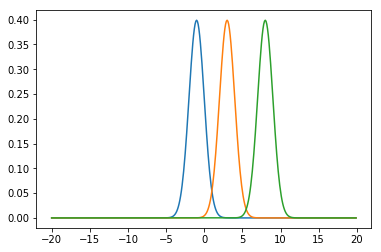

In [168]:
from scipy.stats import norm

def gaussian(x, mu, sig):
    return np.exp(-(x - mu)**2/(2*sig** 2.)) / (np.sqrt(2.*np.pi)*sig)

x = np.arange(-20, 20, .1)

#plot the pdfs of these normal distributions 
plt.plot(x, gaussian(x,-1,1), x, gaussian(x,3,1), x,gaussian(x,8,1))

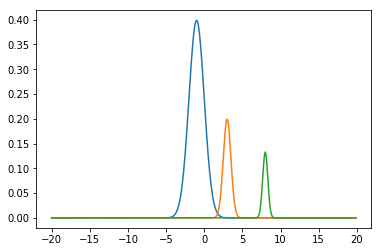

In [167]:
#plot the pdfs of these normal distributions 
plt.plot(x, gaussian(x,-1,1), x, gaussian(x,3,2), x,gaussian(x,8,3))

In [218]:
# Produces a 1D gaussian kernel of standard deviation sigma and size 2*sigma+1
def gaussian_kernel_1d(sigma,dtype=np.float64):
    kernel_radius = np.ceil(sigma) * 3
    kernel_size = kernel_radius * 2 + 1
    ax = np.arange(-kernel_radius, kernel_radius + 1., dtype=dtype)
    kernel = np.exp(-(ax**2) / (2. * sigma**2))
    return (kernel / np.sum(kernel)).reshape(1,kernel.shape[0])


In [193]:
kernel_1d = gaussian_kernel_1d(1)

In [194]:
kernel_1d

array([[0.00443305, 0.05400558, 0.24203622, 0.39905027, 0.24203622,
        0.05400558, 0.00443305]], dtype=float32)

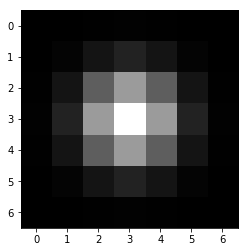

In [227]:
plt.imshow(kernel_1d * kernel_1d.T, cmap="gray")

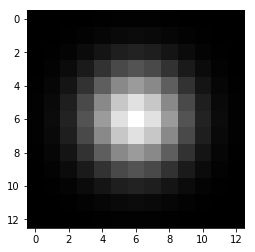

In [228]:
kernel_1d = gaussian_kernel_1d(2)
plt.imshow(kernel_1d * kernel_1d.T, cmap="gray")

Mean blur

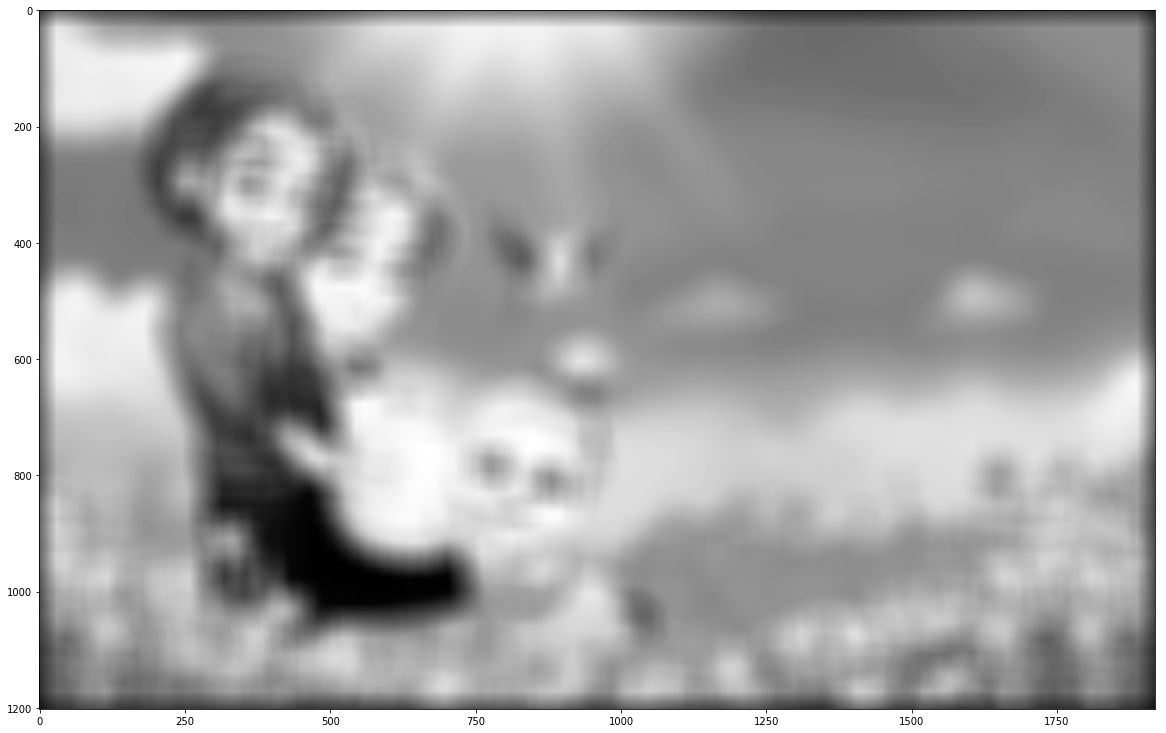

In [224]:
K = np.ones((61,61))
K = K/np.sum(K)

k1 = np.ones((61,1))
k1 = k1/np.sum(k1)


k2 = np.ones((61,1))
k2 = k2/np.sum(k2)

res_k1 = cy_convolve_by_K(im_r, k1)
res_k1k2 = cy_convolve_by_K(res_k1, k2.T )

plt.figure(figsize=(20,20))
plt.imshow(res_k1k2, cmap="gray")

Gaussian blur

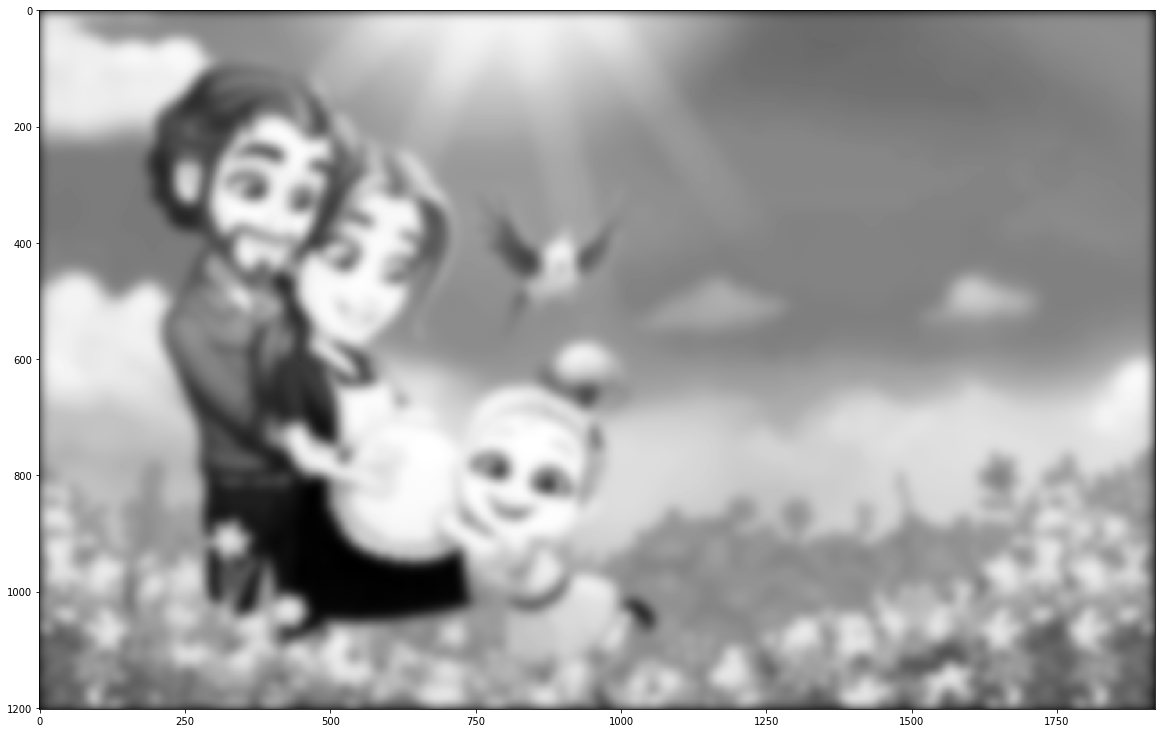

In [225]:
k1 = gaussian_kernel_1d(10)
k1 = k1/np.sum(k1)

k2 = gaussian_kernel_1d(10)
k2 = k2/np.sum(k2)

K = k1*k2.T
K = K/np.sum(K)

res_k1 = cy_convolve_by_K(im_r, k1)
res_k1k2 = cy_convolve_by_K(res_k1, k2.T )

plt.figure(figsize=(20,20))
plt.imshow(res_k1k2, cmap="gray")

Gaussian blur with higher filter

In [229]:
%%time
k1 = gaussian_kernel_1d(20)
k1 = k1/np.sum(k1)

k2 = gaussian_kernel_1d(20)
k2 = k2/np.sum(k2)

K = k1*k2.T
K = K/np.sum(K)

res_k1 = cy_convolve_by_K(im_r, k1)
res_k1k2 = cy_convolve_by_K(res_k1, k2.T )

plt.figure(figsize=(20,20))
plt.imshow(res_k1k2, cmap="gray")

CPU times: user 792 ms, sys: 7.89 ms, total: 800 ms
Wall time: 788 ms


In [230]:
%%time
k1 = gaussian_kernel_1d(20)
k1 = k1/np.sum(k1)

k2 = gaussian_kernel_1d(20)
k2 = k2/np.sum(k2)

K = k1*k2.T
K = K/np.sum(K)

res_k1k2 = cy_convolve_by_K(res_k1, K )

plt.figure(figsize=(20,20))
plt.imshow(res_k1k2, cmap="gray")

CPU times: user 31.2 s, sys: 168 ms, total: 31.4 s
Wall time: 31.5 s


## Bokeh Blur

### Basics of Bokeh Blur

### Making Bokeh blur as separate convolution


#### Bokeh video

https://www.youtube.com/watch?v=vNG3ZAd8wCc

## Edge detection

https://www.youtube.com/watch?v=uihBwtPIBxM